In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 01 - Preprocessing

In computers, images can be stored in multi-dimensional arrays. We will use some classic datasets used in computer vision.

Let's start with CIFAR10. 

> The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

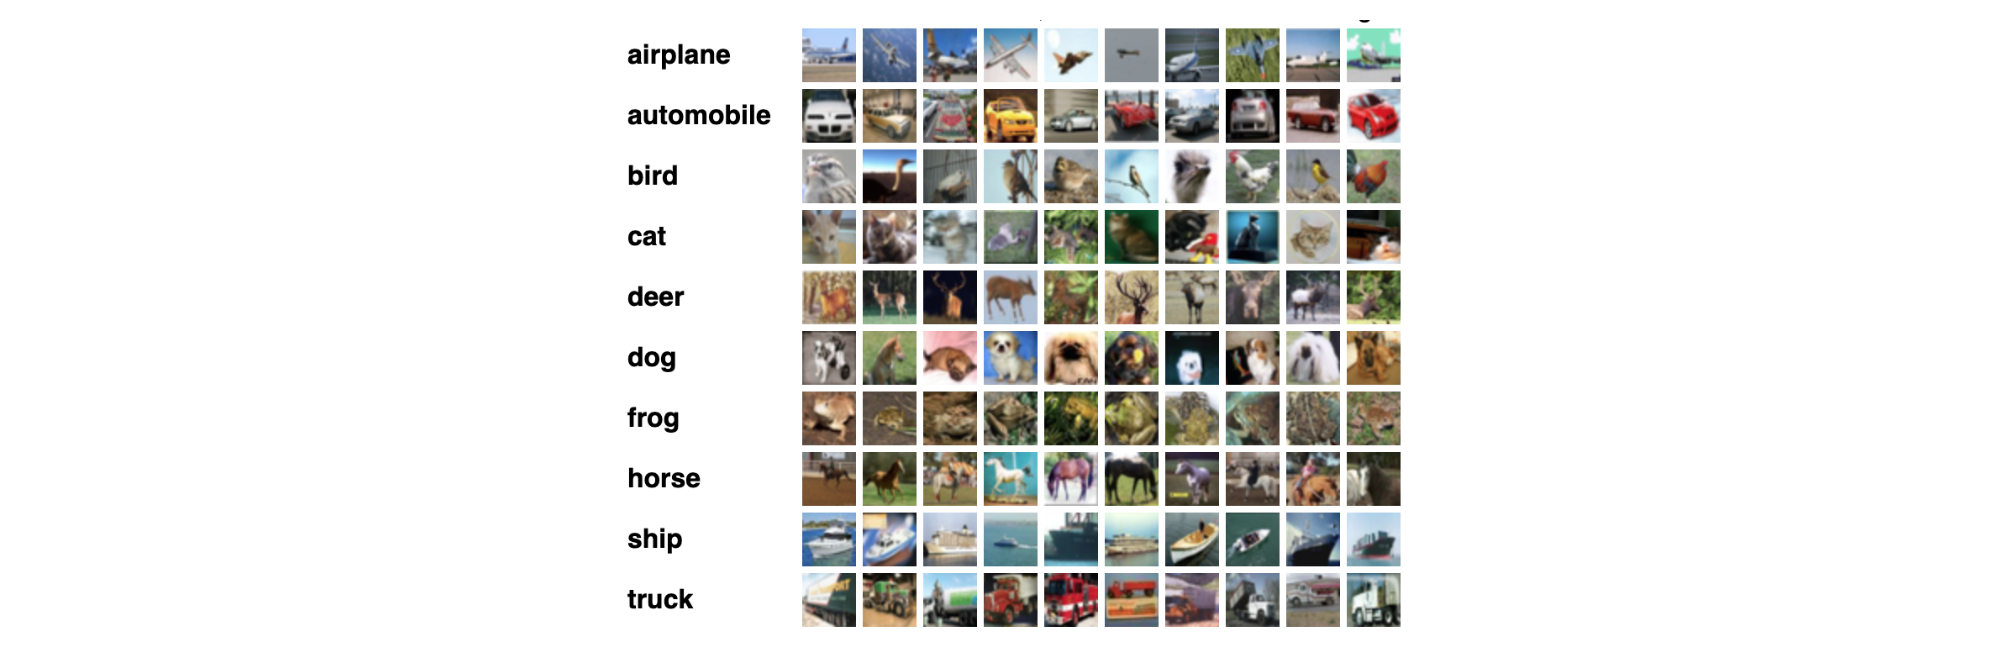

## Convolution

### Simple Matrices

It is possible to do operations on images using convolutions. The main idea is to use a matrix which is called a *kernel* and apply it the matrix containing the image for instance. This is the method used in software like Gimp of Photoshop.

Convolution is very important to transform images and for instance perform data augmentation. It can also be useful to decrease the importance of image elements that are not useful for the classification (for instance, we don't need the image background to detect cats, and we don't want the classifier to learn things related to this). It is also an important first step to understand Convolutional Neural Networks (CNN) that are the deep learning best tools to work on images.

You can find more information about convolution [here](http://setosa.io/ev/image-kernels/) and [here](http://machinelearninguru.com/computer_vision/basics/convolution/image_convolution_1.html).

To get insights about this concept, we will play a bit with matrices and kernels.

You will create a matrix (corresponding to an image) and a kernel which is also a matrix as following:

In [2]:
img = np.arange(16).reshape(4, 4)
img

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [3]:
kernel = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0],
])
kernel

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 0]])

You will try to "apply" the kernel to the image matrix. Use the function `convolve2d` and set the parameter `mode='same'`. It will use zero-padding to be sure that the output has the same shape than the input.


In [4]:
# Your code here


You can see that it returns the `img` matrix unchanged.

Now, try the following kernel:

In [6]:
kernel = np.array([
    [0, 0, 0],
    [0, 2, 0],
    [0, 0, 0],
])
kernel

array([[0, 0, 0],
       [0, 2, 0],
       [0, 0, 0]])

In [7]:
# Your code here


You can see that the center value of the kernel is the only non-zero value. This means that values around will not be taken into account in the convolution. Let's try the following kernel:

In [9]:
kernel = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],
])
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [10]:
# Your code here


Be sure to understand what is going on here. For instance the first value is 10: it is the sum 4, 5 and 1. The other cells are zero because of zero-padding.

If these matrices were images, then each value is the luminance value for a pixel. When we do convolution, the center of the kernel corresponds to the a pixel and depending to the other values in the kernel the pixels around it will be taken into account to calculate the new luminance value. It is thus possible to do blurs and different filter effects.

Let's see on a real image.

### Images

Use the library `imageio` to load the image `test_img1.jpg`. Install Pillow with `pip install Pillow`. It is needed to use `imageio`. Then, display the image using Matplotlib.

Also, you should divide by 255 to have the image on the range [0, 1]. The matrix convolutions will output floats and to plot images, Matplotlib needs either to have image on the range [0, 1] for floats or in the range [0, 255] for integers.

Then, use the following kernel to transform the image:

```python
np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0],
])
```

When it is done, display the resulting image.

In [12]:
# Your code here


As we seen before, this kernel doesn't change our image. But, it shows that our convolution code is working.

Now, try to apply different kernels in order to create the following filters:

- edge detection
- gaussian blur
- sharpen

You should find the corresponding kernels on this [Wikipedia page](https://en.wikipedia.org/wiki/Kernel_(image_processing)).

Also, try a blur with kernels of different size to see the effect of the kernel size.


In [17]:
# Your code here


You can see that these filters can be applied before using the images in the algorithms depending on the task we want to do. You can note that with CNN, this preprocessing step is something that are done by the network: the kernel values are something that can be learned by the neural network.

## Preprocessing

Another way to preprocess images are tools that we have seen applied on other type of data, like standardization and normalization.

These steps are important as data preparation for deep learning for instance, zero-centering was used in:

- AlexNet: ImageNet Classification with Deep Convolutional Neural Networks

- VGG: Very Deep Convolutional Networks for Large-Scale Image Recognition

- ResNet: Deep Residual Learning for Image Recognition


One important thing to keep is mind is that these tools need to be applied across the data samples.

For instance, if we are working with a dataset of 100 images of size 32px x 32px, the corresponding matrix will have a shape of (100, 32, 32). If we flatten the height and the weight, we end up with a matrix of shape (100, 1024).

So here, what is the number of data samples and what is the number of features?


In [22]:
# Your answer here


If you are clear with that, go to the following part.

To experiment on standardization, normalization, we will use a classic dataset: CIFAR10. Try to find an easy way to get it.

In [23]:
# Your code here


You should end up with the variables:

- `X_train` (shape: (50000, 32, 32, 3))
- `y_train` (shape: (50000, 1))
- `X_test` (shape: (10000, 32, 32, 3))
- `y_test` (shape: (10000, 1))

This means that there are 50,000 image in `X_train` for instance. Each image is a 32px by 32px image with 3 color dimensions.

Try to plot the following image: `X_train[2000]`.

In [25]:
# Your code


You should see a horse (note the low definitions of these images).

You will be able to try different preprocessing methods now.

Start by reshaping `X_train` to have the shape samples by pixel (50000, 3072).

In [27]:
# Your code here


In [28]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2] * X_train.shape[3])
X_train.shape

(50000, 3072)

### Zero-Centering

With *zero-centering* or *mean subtraction*, the mean is subtracted from the training data. There are multiple ways to do it. It is common to do a per-pixel mean subtraction: for each pixel you calculate the mean across the training set and do the subtraction.

Try to apply zero-centering to `X_train` (create a new variable called `X_train_zero`).


In [29]:
# Your code here


Again, to plot the result, it is necessary to rescale the values between 0 and 1. This is because they are floats. If values are integers, matplotlib needs values between 0 and 255.

Try to rescale `X_train_zero` between 0 and 1. Then, plot few images and look if they are different from the original dataset.

In [31]:
# Your code here


You should see that there is a slight visual difference with the bright colors but this difference is small.

### Standardization

You can now do the standardization with the same approach than with zero-centering.

In [35]:
# Your code here


To check that your answer is correct, look at the mean and standard deviation for one pixel.

In [37]:
# Your code here


It can also be easier to use `StandardScaler` from Sklearn. Try to get the same result with `StandardScaler`.

In [39]:
# Your code here


Do again some plots to see the difference between raw images and standardized images.

In [71]:
# Your code here


### Whitening

In contrary to mean subtraction or standardization, whitening is usually not needed as preprocessing for convolutional neural networks. Another way that can be used to preprocess images before feeding it to machine learning or deep learning algorithms is to *whiten* the data. In this method, also called *zero component analysis*, the steps are:

- scale the image to have values between 0 and 1.
- calculate the covariance matrix.
- compute the svd of the covariance matrix and store the results in the variables `U`, `S`, and `V`.
- calculate the ZCA with the following code: `X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X_train_rescaled)`. You can use `epsilon = 0.1` and try different values to see the effect.
- rescale `X_ZCA` to have values between 0 and 1.

Use a subset of the CIFAR dataset (only the first 1000 images), because these operations can be slow.


In [45]:
# Your code here


You should get an image that looks like the following (this is `X_ZCA_rescaled[820]`):

<img src="output1.png" width=200>